In [1]:
import torch

In [2]:
import pickle
import os
import numpy as np
import re
import pandas as pd

In [3]:
files = [f for f in os.listdir('.') if os.path.isfile(f)]
files = np.array(files)
bool_mask = ["pickle" in file for file in files]
files

array(['__num_bundles_1000__num_forces_1000.pt',
       '__num_bundles_1000__num_forces_500_pca.png',
       '__num_bundles_10__num_forces_10.pickle',
       '__num_bundles_100__num_forces_100.pt',
       '__num_bundles_2__num_forces_1_pca.png',
       '__num_bundles_1000__num_forces_1000.pickle',
       '__num_bundles_500__num_forces_500.pickle',
       '__num_bundles_10__num_forces_5.pickle',
       '__num_bundles_2__num_forces_1.pickle',
       '__num_bundles_10__num_forces_5_pca.png',
       '__num_bundles_1000__num_forces_500.pickle',
       '__num_bundles_100__num_forces_50.pickle',
       '__num_bundles_10__num_forces_1.pickle',
       '__num_bundles_10__num_forces_10_pca.png',
       '__num_bundles_1__num_forces_1.pt',
       '__num_bundles_500__num_forces_500_pca.png',
       '__num_bundles_100__num_forces_100_pca.png',
       '__num_bundles_500__num_forces_50.pickle',
       '__num_bundles_100__num_forces_10_pca.png',
       '__num_bundles_2__num_forces_2_pca.png',
       '__

In [4]:
pickle_files = files[bool_mask]
pickle_files = [str(file) for file in pickle_files]
pickle_files

['__num_bundles_10__num_forces_10.pickle',
 '__num_bundles_1000__num_forces_1000.pickle',
 '__num_bundles_500__num_forces_500.pickle',
 '__num_bundles_10__num_forces_5.pickle',
 '__num_bundles_2__num_forces_1.pickle',
 '__num_bundles_1000__num_forces_500.pickle',
 '__num_bundles_100__num_forces_50.pickle',
 '__num_bundles_10__num_forces_1.pickle',
 '__num_bundles_500__num_forces_50.pickle',
 '__num_bundles_2__num_forces_2.pickle',
 '__num_bundles_100__num_forces_10.pickle',
 '__num_bundles_1000__num_forces_100.pickle',
 '__num_bundles_500__num_forces_250.pickle',
 '__num_bundles_1__num_forces_1.pickle',
 '__num_bundles_100__num_forces_100.pickle']

In [5]:
import re

In [6]:
def hacky_search(regex, string):
    num_bundles = np.array(re.findall(regex, string))
    num_bundles = num_bundles[[result != '' for result in num_bundles]]
    num_bundles = [re.split(f'_', strr) for strr in num_bundles]
    num_bundles = [ {s[1]: int(s[2])} for s in num_bundles]
    return num_bundles

In [7]:
data = []
for data_file in pickle_files:
    with open(data_file, 'rb') as f:
        x = pickle.load(f)
        
        num_bundles = hacky_search(r'num_bundles_\d*', str(f.name))
        num_forces = hacky_search(r'num_forces_\d*', str(f.name))
        dictt = [{**num_bundles[i], **num_forces[i]} for i in range(len(num_forces))][0]
        try:
            data.append({**x, **dictt})
        except:
            print(f.name, 'failed')

In [23]:
data[0].keys()

dict_keys(['models', 'scores', 'pred_ys', 'true_ys', 'bundles', 'forces'])

In [43]:
import time

100 100
torch.Size([100, 1000])
torch.Size([100, 10])


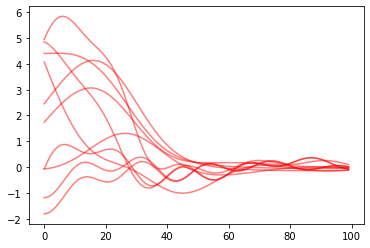

In [47]:
def quick_plot(index, experiment):
    run = data[index]
    print(len(run["pred_ys"][0]), len(run["true_ys"][0]))
    print(run["pred_ys"][0].shape)
    print(run["true_ys"][0].shape)
    #plt.plot(run["pred_ys"][experiment], color = "blue", alpha = 0.5)
    plt.plot(run["true_ys"][experiment], color = 'red', alpha = 0.5)
    time.sleep(0.4)

quick_plot(0,0)

In [27]:
def subset_data(dictt, keys_to_extract = ["scores", "bundles", "forces"]):
    return  {key: dictt[key] for key in keys_to_extract}
    

In [9]:
score_dicts = [subset_data(dat) for dat in data]


In [10]:
df = pd.DataFrame(score_dicts)
df = df.explode('scores').reset_index(drop=True)
df["scores"] = df["scores"].apply(float)
df

,scores,bundles,forces
0,0.163628,10,10
1,0.235940,10,10
2,0.919786,10,10
3,0.308845,10,10
4,0.102040,10,10
...,...,...,...
145,70.397346,100,100
146,0.098869,100,100
147,1.749430,100,100
148,2.773421,100,100


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
df["log_scores"] = np.log10(df["scores"])

<AxesSubplot:xlabel='bundles', ylabel='log_scores'>

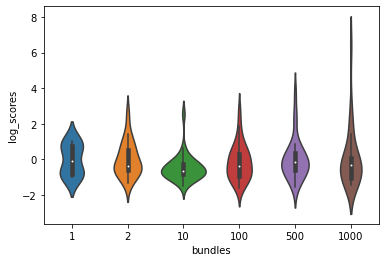

In [12]:
sns.violinplot(x = "bundles", y = "log_scores", data = df)
#plt.yscale('log')

<AxesSubplot:xlabel='forces', ylabel='log_scores'>

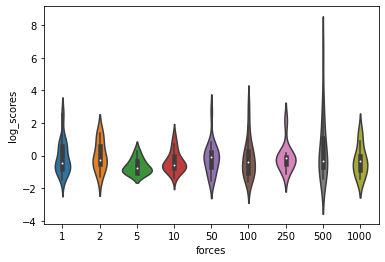

In [13]:
sns.violinplot(x = "forces", y = "log_scores", data = df)

<AxesSubplot:xlabel='bundles', ylabel='log_scores'>

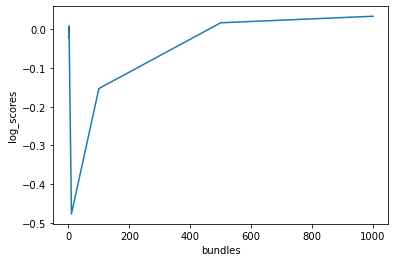

In [51]:
sns.lineplot(x = "bundles", y = "log_scores", data = df.groupby("bundles").mean())

In [15]:
#df.pivot("forces", "bundles", "scores")

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'size'
  cset = contour_func(


<AxesSubplot:xlabel='forces', ylabel='bundles'>

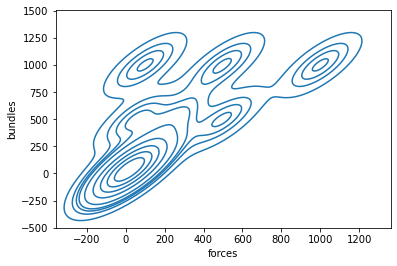

In [16]:
sns.kdeplot(
    data=df, x="forces", y="bundles", size="log_scores", #fill=True,
)

<AxesSubplot:xlabel='bundles', ylabel='log_scores'>

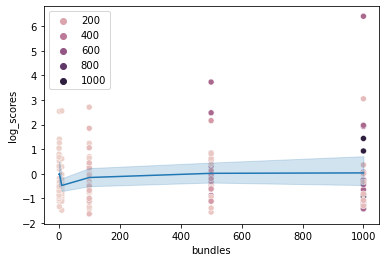

In [17]:
sns.scatterplot( data=df, x="bundles", y ="log_scores", hue = "forces")
sns.lineplot( data=df, x="bundles", y ="log_scores")#, hue = "forces")

<AxesSubplot:xlabel='forces', ylabel='log_scores'>

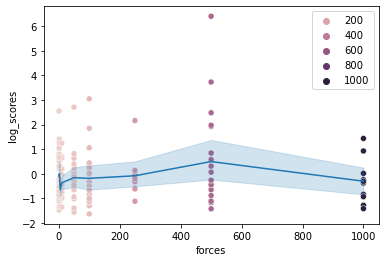

In [18]:
sns.scatterplot( data=df, x="forces", y ="log_scores", hue = "forces")
sns.lineplot( data=df, x="forces", y ="log_scores")#, hue = "forces")

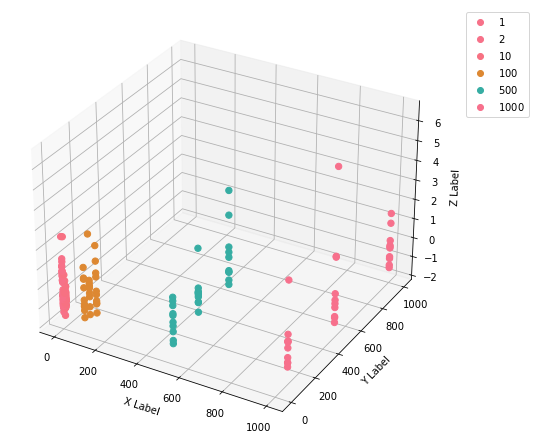

In [19]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# generate data
n = 200
x = df["bundles"].values#np.random.uniform(1, 20, size=n)
y = df["forces"].values
z = df["log_scores"].values

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')